# 앙상블(Ensemble Learning)

앙상블 학습은 여러 개의 기본 학습 모델을 조합하여 더 강력한 모델을 만드는 기법이다.

즉, 한 명의 전문가의 의견보다 여러 명의 전문가들의 의견을 종합한 쪽이 더 신뢰성이 높을 수 있다는 원리와 비슷하다.


### 1. 보팅 (Voting)

  여러개의 다른 종류의 기본 모델들의 예측을 결합하는 가장 간단한 형태의 앙상블 학습이다.

  - 하드보팅 (Hard Voting) : 각 모델의 예측 결과를 투표로 해서 가장 많은 표를 받은 결과를 최종 예측값으로 사용한다.

  - 소프트 보팅(Soft Voting) : 각 모델의 예측 확률을 평균내서, 가장 높은 확률을 가진 결과를 최종 예측값으로 사용한다.



### 2. 배깅 (bagging)
  배깅은 'Bootstrap Aggregating'의 줄임말이다.

  - 원본 데이터셋에서 랜덤하게 샘플을 여러번 추출(Bootstrap)하여,

  - 각 샘플로 모델을 개별적으로 학습시킨 후, 이 결과들을 취합(Aggregating) 하는 기법이다.

  - 대표적인 알고리즘으로 랜덤 포레스트가 있다.

    *Bootstrap : 머신 러닝에서는 데이터셋으로부터 랜덤 샘플링을 통해 학습데이터(Training Data)를 늘리는 방법이다. 데이터 양을 늘릴 수도 있고, 분포를 고르게 만들 수 있는 효과도 가지고 있다.

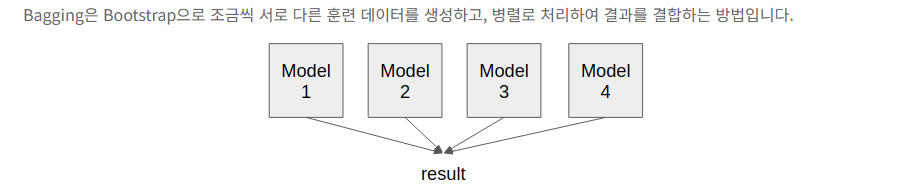

### 3. 부스팅(Boosting)

  부스팅은 잘못 분류된 객체들에 집중하여 새로운 분류 규칙을 생성하는 단계를 반복하는 순차적 학습 알고리즘이다.

  - 부스팅은 여러개의 분류기가 순차적으로 학습(병렬로 학습은 불가능함)

  - 이전 학습시 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서는 틀린 데이터에 더 큰 가중치를 부여해서 표본 추출 후, 학습과 예측을 수행



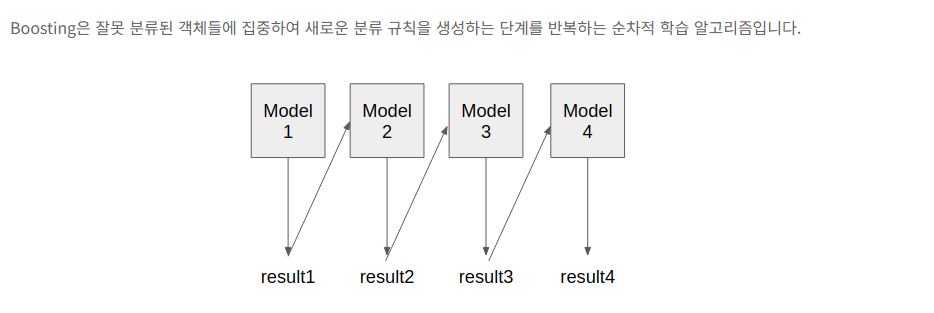

# 랜덤 포레스트 (Random Forest)

앞서 말한 베깅 기법을 활용한 대표적인 알고리즘이다. 여러 개의 결정나무(Decision Trees)를 만들고, 이 나무들의 예측을 종합하여 최종 예측을 내는 방법이다.

작동 원리

1. **부트 스트랩 샘플링**: 원본 데이터셋에서 랜덤하게 샘플을 여러번 추출합니다. * 이때 샘플은 중복 추출이 가능함

2. **특성 무작위 선택** : 각 의사결정나무를 학습시킬 때, 모든 특성을 사용하는 것이 아니라 **일부 특성만 무작위로 선택하여 학습**합니다. 이를 통해 나무들 사이에 상관관계를 줄이고, 다양성을 증가시킨다.

3. **나무 생성** : 각각의 부트스트랩 샘플과 무작위로 선택된 특성을 사용하여 의사결정나무를 학습시킨다.

4. **결과 취합**: 모든 의사결정나무의 예측을 취합하여, 가장 많이 등장하는 클래스 분류 또는 회귀를 최종 예측 결과로 사용한다.

### - 실습

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
clf.fit(X_train, y_train)

# 예측
y_pred = clf.predict(X_test)

# 성능 평가
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 100.00%


https://gsbang.tistory.com/entry/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8Random-Forest